In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
white_wine = pd.read_csv('winequality-white.csv' , sep=';')

In [90]:
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [91]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


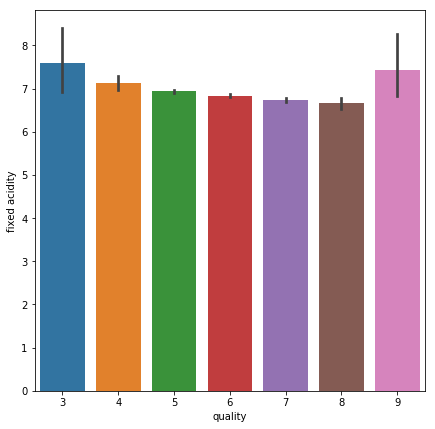

In [92]:
plt.figure(figsize=(7,7))
sns.barplot(x='quality' , y='fixed acidity' , data=white_wine)

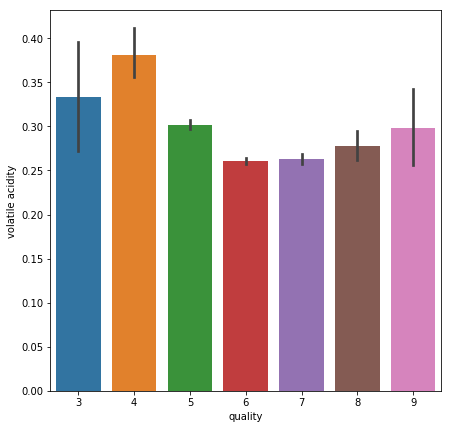

In [93]:
plt.figure(figsize=(7,7))
sns.barplot(x='quality' , y='volatile acidity' , data=white_wine)

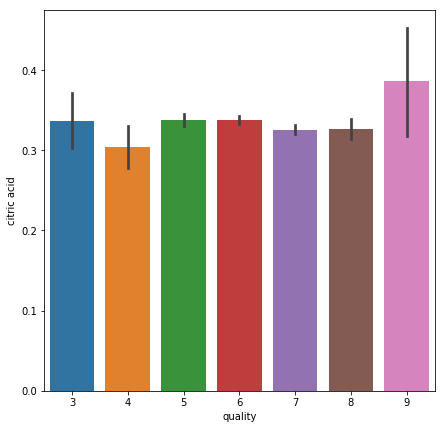

In [94]:
plt.figure(figsize=(7,7))
sns.barplot(x='quality' , y='citric acid' , data=white_wine)

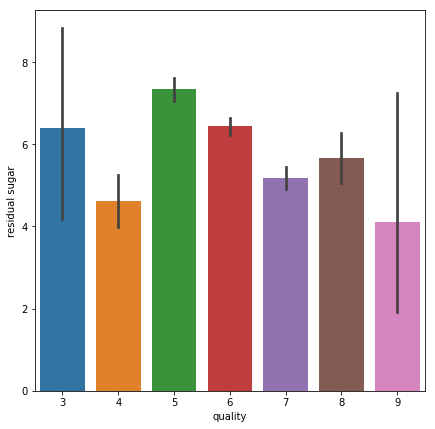

In [95]:
plt.figure(figsize=(7,7))
sns.barplot(x='quality' , y='residual sugar' , data=white_wine)

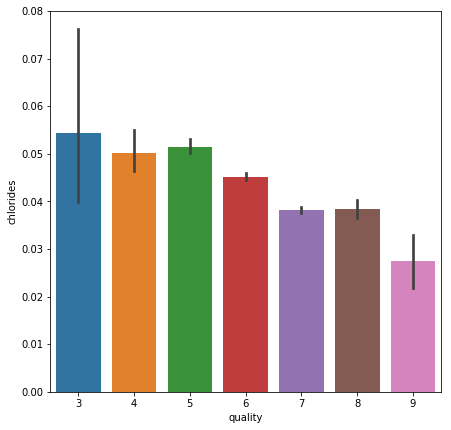

In [97]:
plt.figure(figsize=(7,7))
sns.barplot(x='quality' , y='chlorides' , data=white_wine)
#Decreasing Trend

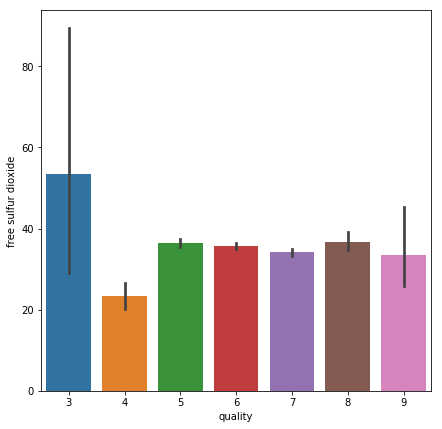

In [98]:
plt.figure(figsize=(7,7))
sns.barplot(x='quality' , y='free sulfur dioxide' , data=white_wine)

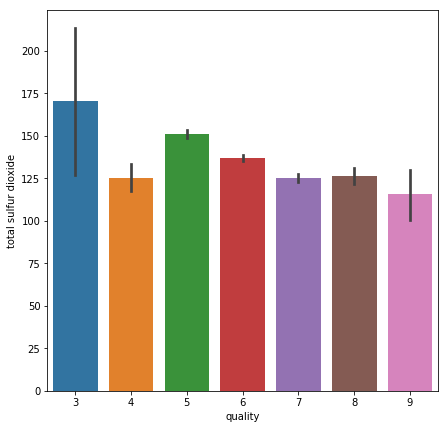

In [99]:
plt.figure(figsize=(7,7))
sns.barplot(x='quality' , y='total sulfur dioxide' , data=white_wine)

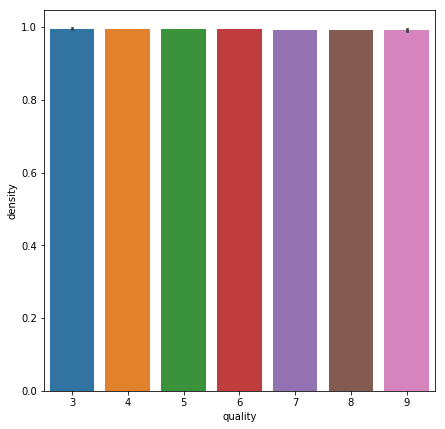

In [100]:
plt.figure(figsize=(7,7))
sns.barplot(x='quality' , y='density' , data=white_wine)

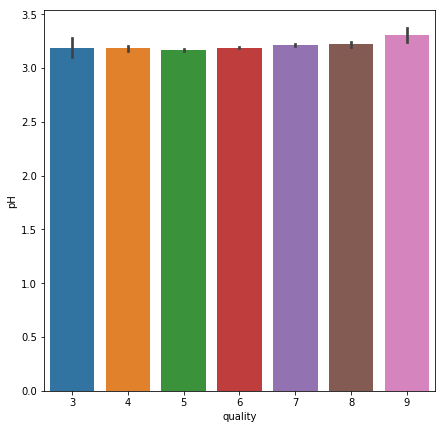

In [101]:
plt.figure(figsize=(7,7))
sns.barplot(x='quality' , y='pH' , data=white_wine)

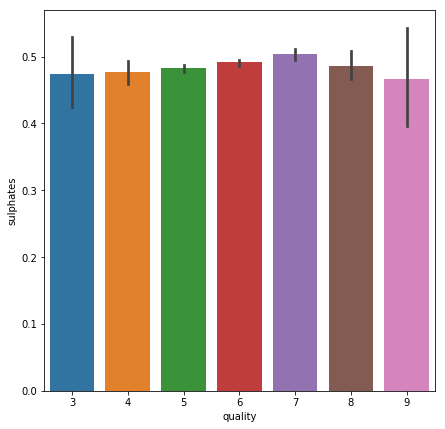

In [102]:
plt.figure(figsize=(7,7))
sns.barplot(x='quality' , y='sulphates' , data=white_wine)

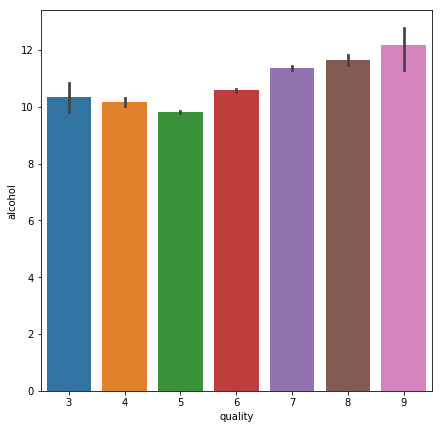

In [103]:
plt.figure(figsize=(7,7))
sns.barplot(x='quality' , y='alcohol' , data=white_wine)

In [104]:
#Pre Processing

In [105]:
white_wine.loc[white_wine['quality'] <=6 , 'label'] = 0

In [106]:
white_wine.loc[white_wine['quality'] >6 , 'label'] = 1

In [107]:
white_wine = white_wine.drop('quality' , axis=1)

In [108]:
X = white_wine.drop('label' , axis=1)
y = white_wine['label']

In [109]:
from sklearn.model_selection import train_test_split
x_train,x_test , y_train,y_test = train_test_split(X , y , test_size=0.25 , random_state=42)

In [110]:
from sklearn.preprocessing import StandardScaler

In [111]:
sc = StandardScaler()

In [112]:
sc.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [113]:
sc.fit(x_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [114]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , classification_report

In [115]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train , y_train)
pred_rfc = rfc.predict(x_test)



In [116]:
print(classification_report(y_test , pred_rfc))

             precision    recall  f1-score   support

        0.0       0.89      0.97      0.93       941
        1.0       0.87      0.61      0.72       284

avg / total       0.89      0.89      0.88      1225



In [117]:
print(confusion_matrix(y_test , pred_rfc))

[[915  26]
 [110 174]]


In [118]:
from sklearn.svm import SVC

In [119]:
svc = SVC()
svc.fit(x_train , y_train)
pred_svc = svc.predict(x_test)

In [120]:
print(classification_report(y_test , pred_svc))

             precision    recall  f1-score   support

        0.0       0.84      0.96      0.89       941
        1.0       0.74      0.39      0.51       284

avg / total       0.82      0.83      0.81      1225



In [121]:
print(confusion_matrix(y_test , pred_svc))

[[901  40]
 [172 112]]


In [122]:
from sklearn.model_selection import cross_val_score

In [125]:
rf_scorer = cross_val_score(estimator=rfc , X=x_train , y=y_train , cv=10)

In [126]:
rf_scorer.mean()

0.8698496935980573